#**Early Stage Alzheimer Prediction**


**1.Data Loading and Initial Processing**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
import pickle

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

## **2.Loading Data**

In [33]:
# Load the dataset
df = pd.read_csv('Alz.csv')
df.head()

,directory.id,Subject,RID,Image.Data.ID,Modality,Visit,Acq.Date,DX.bl,EXAMDATE,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,Dx Codes for Submission
0,4702245ea294ce5d4e9b8a87027dfdf4,011_S_0003,3,32237,MRI,1,09-01-2005,AD,09-12-2005,81.3,Male,18,Not Hisp/Latino,White,1,20,True,"3,4",AD
1,2e89e352af743597b2368c412e0f6de2,022_S_0004,4,64631,MRI,1,9/22/05,LMCI,11-08-2005,67.5,Male,10,Hisp/Latino,White,0,27,False,"3,3",MCI
2,90419199306997753de8042f1fd55e38,011_S_0005,5,32246,MRI,1,09-02-2005,CN,09-07-2005,73.7,Male,16,Not Hisp/Latino,White,0,29,True,"3,3",CN
3,d8d175ffff1e2053e6a18c5df494ccdf,100_S_0006,6,33025,MRI,1,11/15/05,LMCI,11/29/05,80.4,Female,13,Not Hisp/Latino,White,0,25,True,"3,3",MCI
4,986e75b2e604cd44b38feb2188476fb2,011_S_0010,10,32270,MRI,1,11-07-2005,AD,11-10-2005,73.9,Female,12,Not Hisp/Latino,White,1,24,True,"3,4",AD



## **3. Initial Data Inspection**

In [34]:
print(df.shape)
print(df.describe())
print(df.info())

(628, 19)
               RID  Image.Data.ID  Visit         AGE    PTEDUCAT       APOE4  \
count   628.000000     628.000000  628.0  628.000000  628.000000  628.000000   
mean    695.226115   54536.740446    1.0   75.169586   15.616242    0.598726   
std     415.079528   19825.464055    0.0    6.687429    2.977993    0.683456   
min       3.000000   31084.000000    1.0   55.100000    6.000000    0.000000   
25%     335.750000   38842.000000    1.0   71.200000   13.000000    0.000000   
50%     693.500000   50442.500000    1.0   75.450000   16.000000    0.000000   
75%    1044.250000   64641.250000    1.0   80.000000   18.000000    1.000000   
max    1427.000000  140335.000000    1.0   89.600000   20.000000    2.000000   

             MMSE  
count  628.000000  
mean    26.920382  
std      2.562152  
min     20.000000  
25%     25.000000  
50%     27.000000  
75%     29.000000  
max     30.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (tot

## **4. Checking Null Values**

In [42]:
# Fill missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [43]:
# Initial Data Inspection
print("Dataset shape:", df.shape)
print("Dataset info:")
df.info()
print("Dataset description:")
df.describe()

Dataset shape: (628, 19)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   directory.id             628 non-null    object 
 1   Subject                  628 non-null    object 
 2   RID                      628 non-null    int64  
 3   Image.Data.ID            628 non-null    int64  
 4   Modality                 628 non-null    object 
 5   Visit                    628 non-null    int64  
 6   Acq.Date                 628 non-null    object 
 7   DX.bl                    628 non-null    object 
 8   EXAMDATE                 628 non-null    object 
 9   AGE                      628 non-null    float64
 10  PTGENDER                 628 non-null    object 
 11  PTEDUCAT                 628 non-null    int64  
 12  PTETHCAT                 628 non-null    object 
 13  PTRACCAT                 628 non-null    

,RID,Image.Data.ID,Visit,AGE,PTEDUCAT,APOE4,MMSE
count,628.000000,628.000000,628.0,628.000000,628.000000,628.000000,628.000000
mean,695.226115,54536.740446,1.0,75.169586,15.616242,0.598726,26.920382
std,415.079528,19825.464055,0.0,6.687429,2.977993,0.683456,2.562152
min,3.000000,31084.000000,1.0,55.100000,6.000000,0.000000,20.000000
25%,335.750000,38842.000000,1.0,71.200000,13.000000,0.000000,25.000000
50%,693.500000,50442.500000,1.0,75.450000,16.000000,0.000000,27.000000
75%,1044.250000,64641.250000,1.0,80.000000,18.000000,1.000000,29.000000
max,1427.000000,140335.000000,1.0,89.600000,20.000000,2.000000,30.000000



# **Exploratory Data Analysis (EDA)**

## **6.Distribution of numerical features**

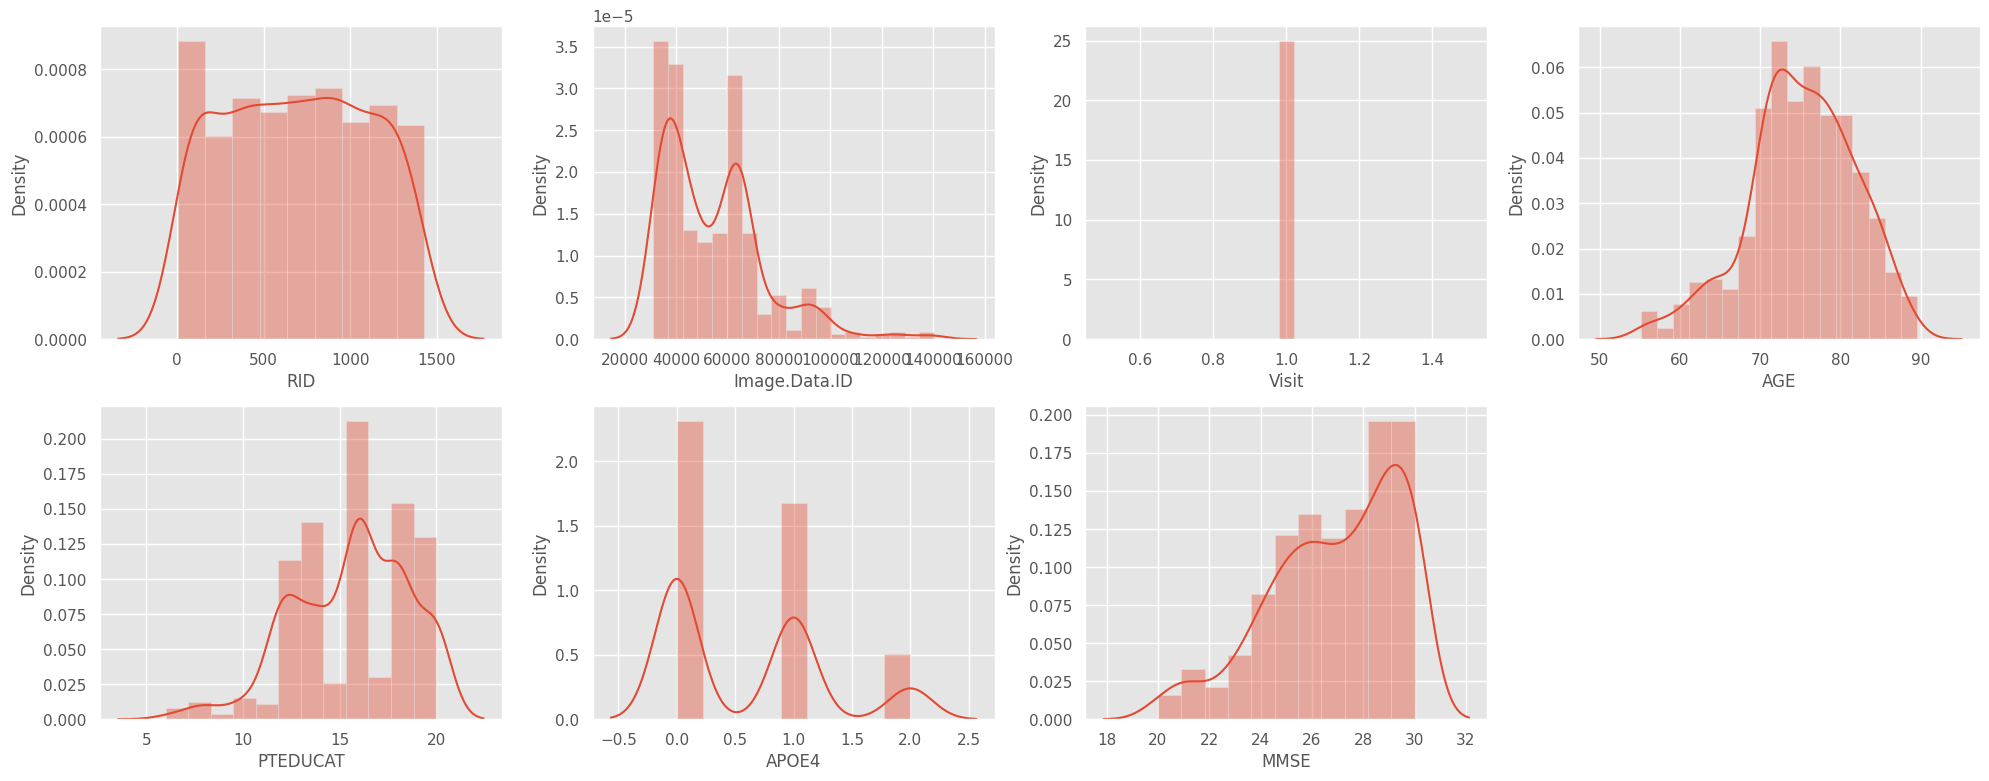

In [45]:
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in df.columns:
    if plotnumber <= len(df.columns) and df[column].dtype in ['int64', 'float64']: # Check if column is numeric
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        plotnumber += 1
plt.tight_layout()
plt.show()


## Feature scaling

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# **Model Building**

## **8.Preparing Data for Training**

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC-ROC: {auc}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    return accuracy, precision, recall, f1, auc

###**K-Nearest Neighbors (KNN)**

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
# ... (previous code)

# Calculate precision for KNN and other models if not already done
knn_precision = precision_score(y_test, knn.predict(X_test))
# Similarly calculate precision for other models (dtc, rf, xgb, svc, gbc) if needed



print(f"Training Accuracy of KNN: {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN: {knn_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, knn_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, knn_y_pred)}")
print(f"AUC-ROC Score: {knn_auc}")

Training Accuracy of KNN: 0.8230912476722533
Test Accuracy of KNN: 0.6926406926406926
Confusion Matrix:
[[119  32]
 [ 39  41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231

AUC-ROC Score: 0.7482615894039735


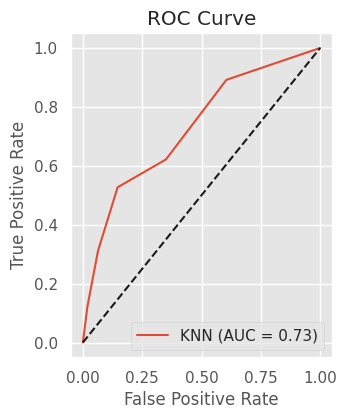

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Decision Tree**

Decision Tree Performance:
Accuracy: 0.7056277056277056
Precision: 0.7251709979959173
Recall: 0.7056277056277056
F1-score: 0.7111829985702434
AUC-ROC: 0.701365894039735
Confusion Matrix:
[[108  43]
 [ 25  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231

Training Accuracy of Decision Tree: 1.0
Test Accuracy of Decision Tree: 0.7056277056277056
Confusion Matrix:
[[108  43]
 [ 25  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg 

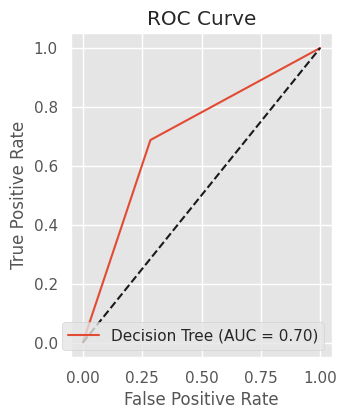

In [53]:

print("Decision Tree Performance:")

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_accuracy, dtc_precision, dtc_recall, dtc_f1, dtc_auc = evaluate_model(dtc, X_test, y_test)
dtc_y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_y_pred)
dtc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of Decision Tree: {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree: {dtc_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, dtc_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, dtc_y_pred)}")
print(f"AUC-ROC Score: {dtc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {dtc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **Random Forest**

Training Accuracy of Random Forest: 1.0
Test Accuracy of Random Forest: 0.7445887445887446
Confusion Matrix:
[[120  31]
 [ 28  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.63      0.65      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231

AUC-ROC Score: 0.8078228476821192


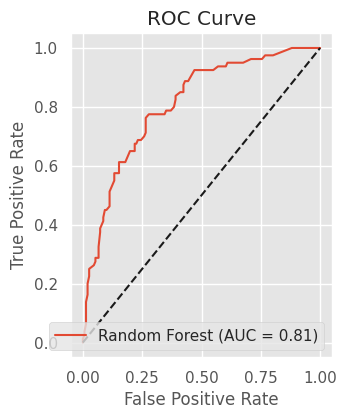

In [54]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of Random Forest: {accuracy_score(y_train, rf_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest: {rf_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rf_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, rf_y_pred)}")
print(f"AUC-ROC Score: {rf_auc}")

fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### **XGBoost**

Training Accuracy of XGBoost: 1.0
Test Accuracy of XGBoost: 0.7272727272727273
Confusion Matrix:
[[116  35]
 [ 28  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.65      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.73      0.73       231

AUC-ROC Score: 0.7832781456953642


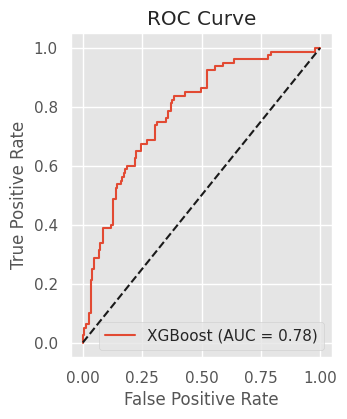

In [55]:
# XGBoost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

print(f"Training Accuracy of XGBoost: {accuracy_score(y_train, xgb_clf.predict(X_train))}")
print(f"Test Accuracy of XGBoost: {xgb_acc}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, xgb_y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, xgb_y_pred)}")
print(f"AUC-ROC Score: {xgb_auc}")

fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(3, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## **Support Vector Machine**

In [56]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
print("Support Vector Machine Performance:")
svc_accuracy, svc_precision, svc_recall, svc_f1, svc_auc = evaluate_model(svc, X_test, y_test)


Support Vector Machine Performance:
Accuracy: 0.7489177489177489
Precision: 0.7450858087800764
Recall: 0.7489177489177489
F1-score: 0.7464721425760387
AUC-ROC: 0.7975579470198676
Confusion Matrix:
[[125  26]
 [ 32  48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231




## **Gradient Boosting**

In [57]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print("Gradient Boosting Performance:")
gbc_accuracy, gbc_precision, gbc_recall, gbc_f1, gbc_auc = evaluate_model(gbc, X_test, y_test)


Gradient Boosting Performance:
Accuracy: 0.7532467532467533
Precision: 0.7555716019571441
Recall: 0.7532467532467533
F1-score: 0.7542795961040826
AUC-ROC: 0.7956953642384106
Confusion Matrix:
[[121  30]
 [ 27  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



##  **Voting Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
# Assuming you want to use a RandomForestClassifier, create and fit it
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('dt', dtc), ('rf', rfc), ('svc', svc), ('gb', gbc)], voting='soft')
voting_clf.fit(X_train, y_train)
print("Voting Classifier Performance:")
voting_accuracy, voting_precision, voting_recall, voting_f1, voting_auc = evaluate_model(voting_clf, X_test, y_test)

Voting Classifier Performance:
Accuracy: 0.7489177489177489
Precision: 0.7600848739416146
Recall: 0.7489177489177489
F1-score: 0.7524816269002316
AUC-ROC: 0.7991721854304635
Confusion Matrix:
[[116  35]
 [ 23  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.71      0.66        80

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



# **Model Comparison**

In [61]:
models = ['K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier']
accuracy = [knn_acc, dtc_acc, rf_acc, xgb_acc]
auc_scores = [knn_auc, dtc_auc, rf_auc, xgb_auc]

models_acc_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'AUC-ROC': auc_scores})
models_acc_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,AUC-ROC
2,Random Forest Classifier,0.744589,0.807823
3,XGBoost Classifier,0.727273,0.783278
1,Decision Tree Classifier,0.705628,0.701366
0,K-Nearest Neighbors,0.692641,0.748262


In [75]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Define models and their performances
models = ['K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier', 'Support Vector Machine', 'Gradient Boosting', 'Voting Classifier']
accuracies = [knn_acc, dtc_acc, rf_acc, xgb_acc, svc_accuracy, gbc_accuracy, voting_accuracy]



# Create a DataFrame for better visualization
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,

})

# Sort the DataFrame by Accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("Model Comparison Results:")
print(results_df)

# Identifying the Best Model
best_model_name = results_df.iloc[0]['Model']
best_model_accuracy = results_df.iloc[0]['Accuracy']


print(f"\nThe best model is: {best_model_name}")
print(f"Accuracy: {best_model_accuracy}")



Model Comparison Results:
                      Model  Accuracy
5         Gradient Boosting  0.753247
4    Support Vector Machine  0.748918
6         Voting Classifier  0.748918
2  Random Forest Classifier  0.744589
3        XGBoost Classifier  0.727273
1  Decision Tree Classifier  0.705628
0       K-Nearest Neighbors  0.692641

The best model is: Gradient Boosting
Accuracy: 0.7532467532467533


### **Saving the Random Forest Model as it had the highest accuracy in the example**

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
model =  GradientBoostingClassifier(n_estimators=20)
model.fit(X_train, y_train)
print(f"Accuracy of Gradient descent is ",gbc_accuracy*100)
pickle.dump(model, open('Az.pkl', 'wb'))

Accuracy of Gradient descent is  75.32467532467533
